In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_excel('sydney_transportation.xlsx')

In [55]:
df.head()

,cartime,carcost,traintime,traincost,choice
0,70,50,64,39,0
1,50,230,60,32,0
2,50,70,58,40,1
3,60,108,93,62,1
4,70,60,68,26,0


In [56]:
df.describe()

,cartime,carcost,traintime,traincost,choice
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,45.465465,57.753754,66.321321,38.219219,0.549550
std,18.308670,33.551875,19.296561,14.497507,0.498288
min,10.000000,8.000000,3.000000,7.000000,0.000000
25%,30.000000,32.000000,56.000000,28.000000,0.000000
50%,45.000000,50.000000,67.000000,36.000000,1.000000
75%,60.000000,70.000000,76.000000,46.000000,1.000000
max,95.000000,230.000000,145.000000,97.000000,1.000000


In [57]:
df.isna().sum()

cartime      0
carcost      0
traintime    0
traincost    0
choice       0
dtype: int64

In [58]:
df.shape

(333, 5)

In [59]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


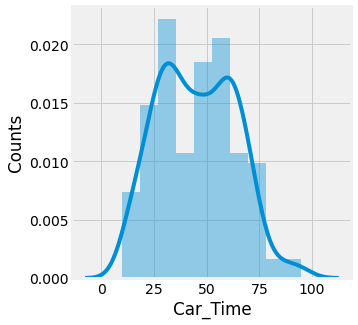

In [23]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
#plt.hist(df['cartime'],bins = 15)
sns.distplot(x=df.cartime, hist= True)
plt.xlabel('Car_Time')
plt.ylabel('Counts')
plt.show()

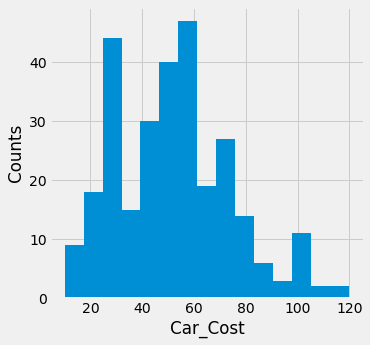

In [24]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
plt.hist(df['carcost'],bins = 15)
plt.xlabel('Car_Cost')
plt.ylabel('Counts')
plt.show()

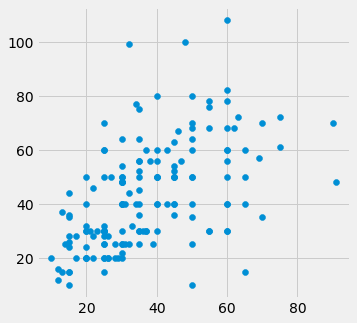

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(x=df[df['choice']==1]['cartime'], y=df[df['choice']==1]['carcost'])
plt.show()

c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


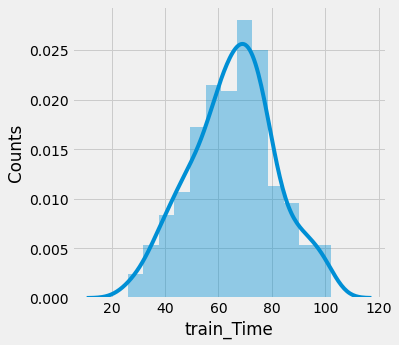

In [26]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
#plt.hist(df['traintime'],bins = 15)
sns.distplot(x=df.traintime, hist= True)
plt.xlabel('train_Time')
plt.ylabel('Counts')
plt.show()

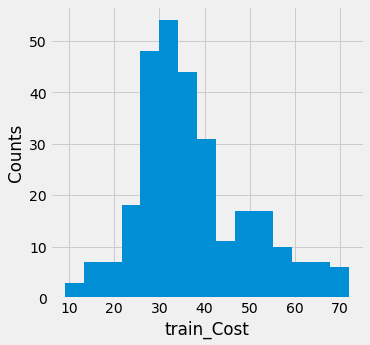

In [27]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
plt.hist(df['traincost'],bins = 15)
plt.xlabel('train_Cost')
plt.ylabel('Counts')
plt.show()

In [28]:
target = df['choice'].value_counts()
target

1    160
0    127
Name: choice, dtype: int64

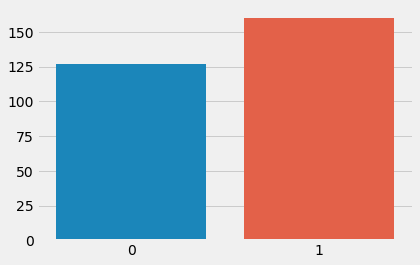

In [29]:
sns.barplot(x = target.index.tolist() , y = target.values.tolist())
plt.show()

In [60]:
indep = []
for i in df.columns:
    if i!='choice':
        indep.append(i)
    else:
        continue
print(indep)

['cartime', 'carcost', 'traintime', 'traincost']


In [61]:
indep

['cartime', 'carcost', 'traintime', 'traincost']

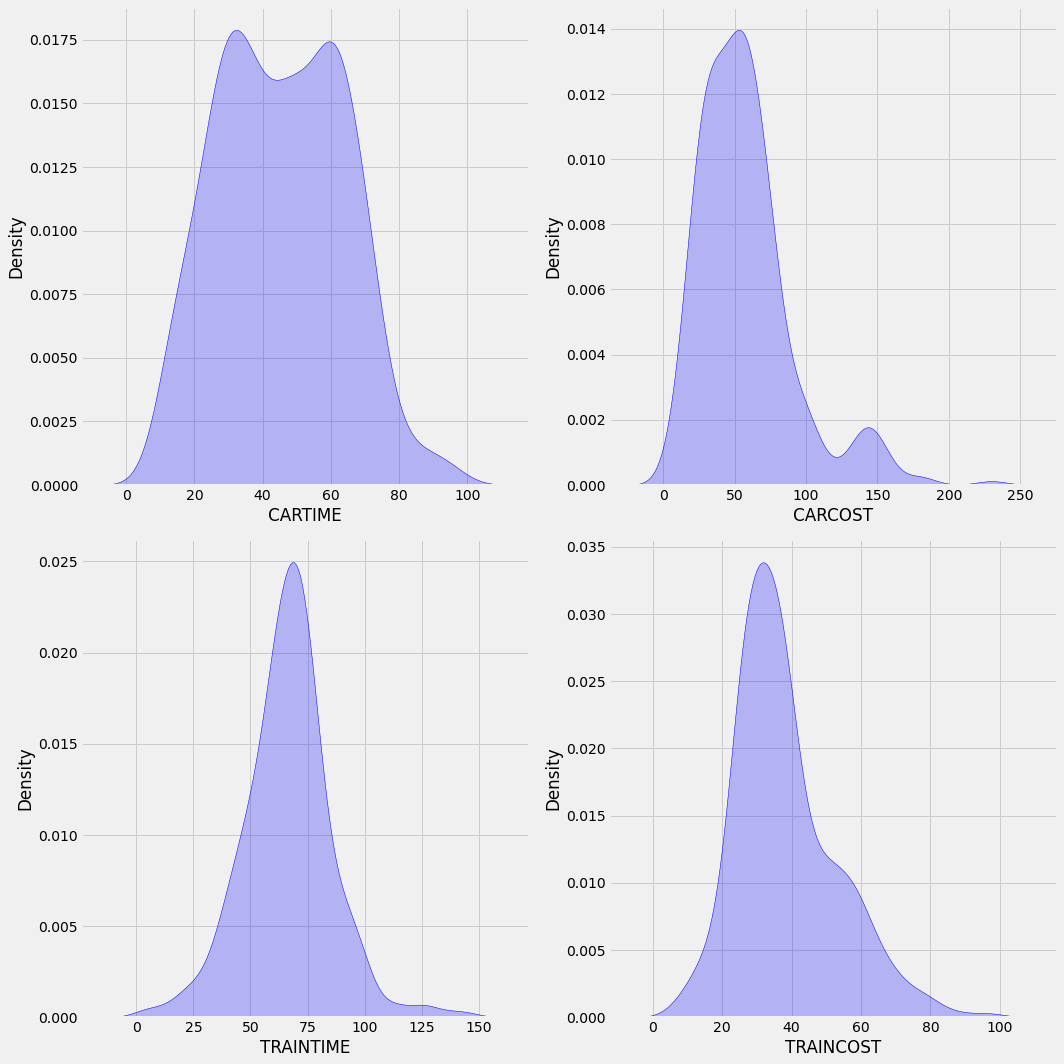

In [62]:
plt.figure(figsize = (15,15))
for i in range(0,len(indep)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[indep[i]],shade = True, color = 'b')
    plt.xlabel(indep[i].upper())
    plt.tight_layout()

Observation:

    Carcost and Traincost are positively skewed
    Cartime is not normaly distributed

In [63]:
df.corr()

,cartime,carcost,traintime,traincost,choice
cartime,1.000000,0.508512,0.364539,0.022378,-0.495300
carcost,0.508512,1.000000,0.185283,0.002582,-0.448053
traintime,0.364539,0.185283,1.000000,0.471529,-0.055071
traincost,0.022378,0.002582,0.471529,1.000000,0.352278
choice,-0.495300,-0.448053,-0.055071,0.352278,1.000000


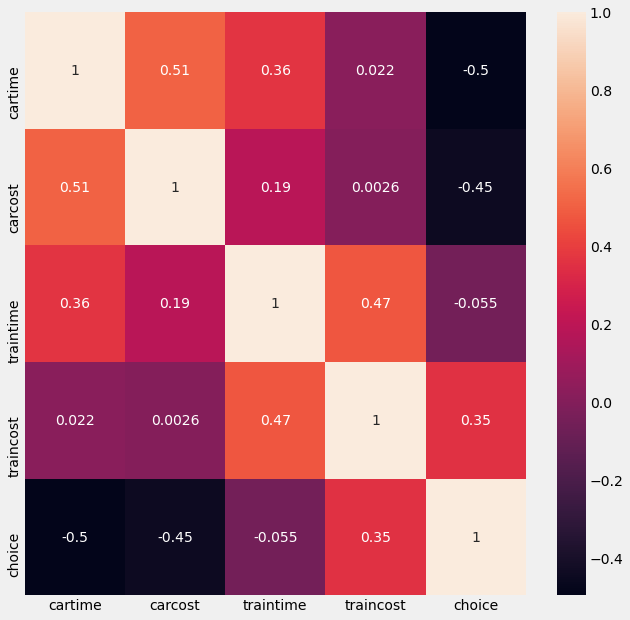

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observation:

    Cartime, Carcos and Traintime are negativily correlated with choice

In [65]:
indep

['cartime', 'carcost', 'traintime', 'traincost']

c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda

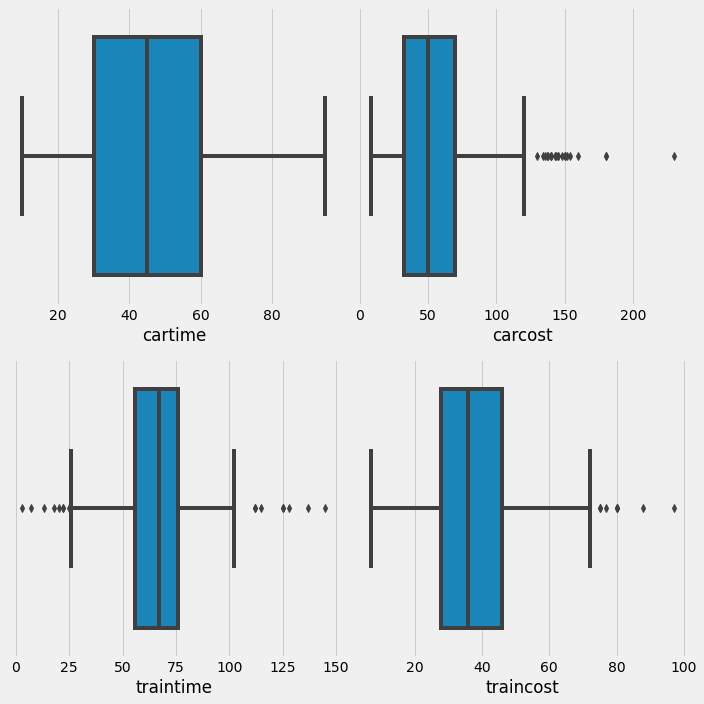

In [67]:
plt.figure(figsize=(10,10))
for i in range(0,len(indep)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[indep[i]])
    plt.xlabel(indep[i])
    plt.tight_layout()

Observation:

    Cartime has no outliers, in otherhand carcost and highest ouliers

In [68]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cartime      30.0
carcost      38.0
traintime    20.0
traincost    18.0
choice        1.0
dtype: float64


In [69]:
IQR

cartime      30.0
carcost      38.0
traintime    20.0
traincost    18.0
choice        1.0
dtype: float64

In [70]:
IQR.index.tolist()

['cartime', 'carcost', 'traintime', 'traincost', 'choice']

In [71]:
IQR.values.tolist()

[30.0, 38.0, 20.0, 18.0, 1.0]

In [72]:
df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda

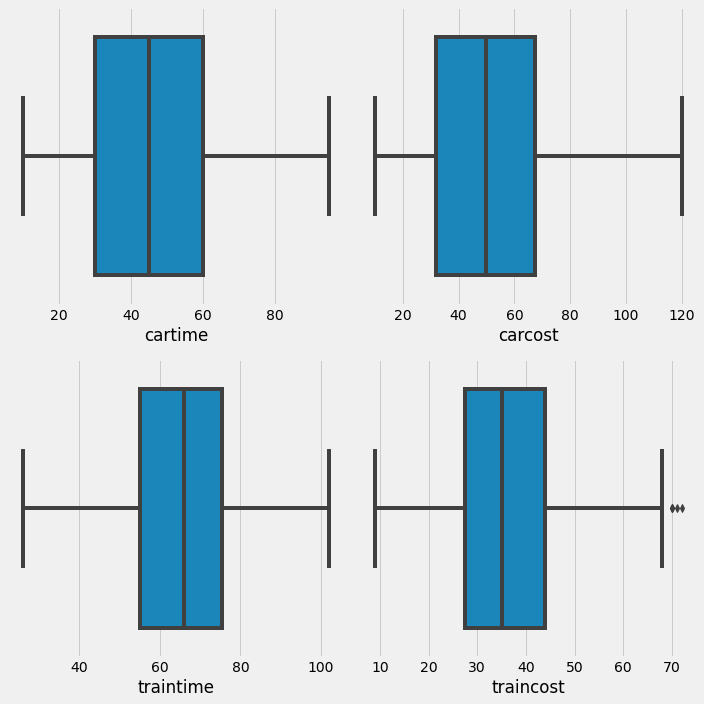

In [73]:
plt.figure(figsize=(10,10))
for i in range(0,len(indep)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[indep[i]])
    plt.xlabel(indep[i])
    plt.tight_layout()

In [74]:
df[indep].isna().sum()

cartime      0
carcost      0
traintime    0
traincost    0
dtype: int64

In [21]:
Q1 = df['traincost'].quantile(0.25)
Q3 = df['traincost'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

16.5


In [31]:
df.traincost= df.traincost[~(df.traincost > (Q3 + 1.5 * IQR))]

c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dell pc\anaconda

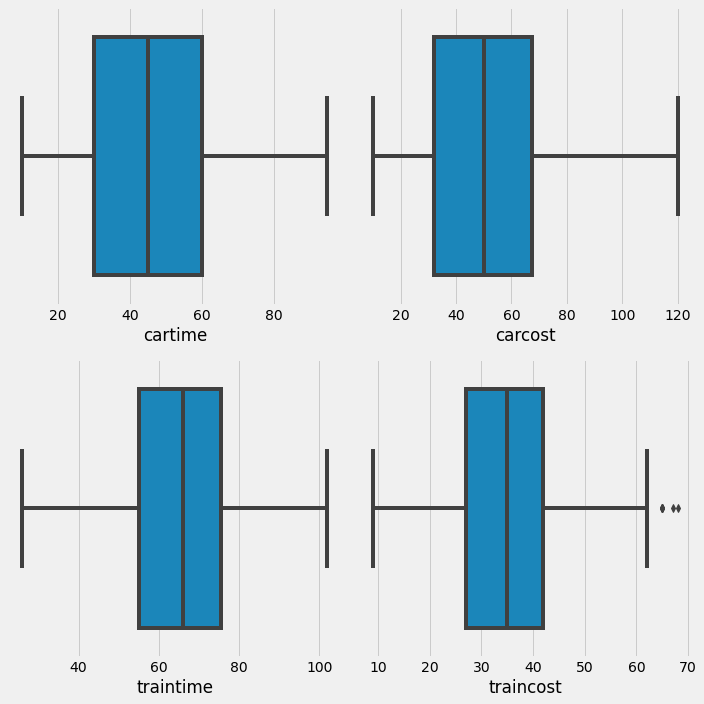

In [33]:
plt.figure(figsize=(10,10))
for i in range(0,len(indep)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[indep[i]])
    plt.xlabel(indep[i])
    plt.tight_layout()

In [75]:
x = df[indep]
y = df['choice']

In [76]:
print(x.shape)
print(y.shape)

(287, 4)
(287,)


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 0)

In [79]:
scaler = StandardScaler()
scaler

StandardScaler()

In [80]:
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

In [81]:
log = LogisticRegression()
log

LogisticRegression()

In [82]:
log.fit(x_train,y_train)

LogisticRegression()

In [83]:
log_prd = log.predict(x_test)

In [84]:
log_prd

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [86]:
cm = confusion_matrix(y_test,log_prd)
cm

array([[29, 10],
       [ 6, 42]], dtype=int64)

In [87]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

In [88]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8160919540229885

Observation: 
    Here the future cartime is not normaly distributed

Let's use standardization

In [89]:
x_train

array([[-7.01849007e-03, -7.26221407e-01,  1.74437676e+00,
         5.86226327e-01],
       [-2.76960416e-01, -9.98895277e-01,  2.31911361e-01,
         1.46656620e+00],
       [-1.24875135e+00, -2.71764957e-01,  6.73047103e-01,
        -3.74144448e-01],
       [ 6.94830516e-01,  3.64474073e-01,  9.88144062e-01,
         1.06040940e-01],
       [-1.62667004e+00, -1.90780818e+00, -1.34357343e+00,
        -1.97476241e+00],
       [ 1.34269114e+00,  1.00071310e+00, -5.87340731e-01,
        -5.40208561e-02],
       [ 8.02807287e-01,  3.64474073e-01,  9.88144062e-01,
        -5.40208561e-02],
       [-7.01849007e-03, -7.71667052e-01, -8.31855971e-02,
        -1.34051754e-01],
       [ 1.07274921e+00, -8.99823771e-02,  2.12249311e+00,
         1.06641171e+00],
       [ 2.62923436e-01, -5.44438827e-01, -2.01662053e-02,
        -8.54329835e-01],
       [ 2.62923436e-01,  3.64474073e-01,  4.20969537e-01,
        -5.34206243e-01],
       [-1.14995260e-01,  3.64474073e-01, -7.13379514e-01,
      